# Fuzzy String Matching 

 approximately match strings and determine how similar they are

In [54]:
Str1 = "Apple Inc."
Str2 = "Apple Inc."

Result = Str1 == Str2
print(Result)

True


the variable Result will print __True__ since the strings are an exact match (100% similarity), 

In [55]:
Str1 = "Apple Inc."
Str2 = "apple Inc."

Result = Str1 == Str2
print(Result)

False


In [56]:
Str1 = "Apple Inc."
Str2 = "apple Inc"
Result = Str1.lower() == Str2.lower()
print(Result)

False


Situations like the one above can, at times, appear on databases that have been created based on human data entry and in these cases we need more powerful tools to compare strings. One of these tools is called the __Levenshtein distance__.

## The Levenshtein Distance
The Levenshtein distance is a metric to measure how apart are two sequences of words. In other words, it measures the minimum number of edits that you need to do to change a one-word sequence into the other. 

These edits can be insertions, deletions or substitutions. 

This metric was named after Vladimir Levenshtein, who originally considered it in 1965.

Unlike the __Hamming__ distance, the __Levenshtein__ distance works on strings with an unequal length.

The greater the Levenshtein distance, the greater are the difference between the strings. 

For example, from "test" to "test" the Levenshtein distance is 0 because both the source and target strings are identical. No transformations are needed. 

In contrast, from "test" to "team" the Levenshtein distance is 2 - two substitutions have to be done to turn "test" in to "team".

__Installation__

Install via pip :

    pip install fuzzywuzzy
    pip install python-Levenshtein

In [9]:
from fuzzywuzzy import fuzz 
from fuzzywuzzy import process 

C:\Users\Sky\anaconda3\envs\tensorflow_env\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


### Simple Ratio

In [59]:
print(fuzz.ratio("this is a test!!!", "this is a test!"))
print(fuzz.ratio("ACME Factory", "ACME Factory Inc."))
print(fuzz.ratio('Barack Obama', 'Barack H. Obama'))

94
83
89


check the partial_ratio results 

### Partial ratio

In [60]:
print(fuzz.partial_ratio("this is a test", "this is a test!"))
print(fuzz.partial_ratio("ACME Factory", "ACME Factory Inc."))
print(fuzz.partial_ratio('Barack Obama', 'Barack H. Obama'))

100
100
75


different variations in Barack Obama’s name produce a lower score for the partial ratio, 

why is that? 

Probably because the extra token for the middle name is right in the middle of the string. 

### Token Sort Ratio

In [72]:
print(fuzz.token_sort_ratio('Barack Obama', 'Barack H. Obama'))
print(fuzz.token_sort_ratio('Barack H Obama', 'H Barack  Obama'))

92
100


In [64]:
print(fuzz.token_set_ratio('Barack Obama', 'Barack H. Obama'))
print(fuzz.token_set_ratio('Barack H Obama', 'Barack H. Obama'))

100
100


In [14]:
print(fuzz.ratio("fuzzy wuzzy was a bear", "wuzzy fuzzy was a bear"))
print(fuzz.token_sort_ratio("fuzzy wuzzy was a bear", "wuzzy fuzzy was a bear"))

91
100


### Token Set Ratio

In [15]:
print(fuzz.token_sort_ratio("fuzzy was a bear", "fuzzy fuzzy was a bear"))
print(fuzz.token_set_ratio("fuzzy was a bear", "fuzzy fuzzy was a bear"))

84
100


## How they work?

__fuzz.ratio__

Simple. Just calls difflib.ratio on the two input strings

In [73]:
fuzz.ratio("NEW YORK MEATS", "NEW YORK MEATS")

100

In [74]:
fuzz.ratio("NEW YORK MEATS", "NEW YORK MEATS!!!")

90

In [75]:
fuzz.token_set_ratio("NEW YORK MEATS", "NEW YORK MEATS!!!")

100

As seen in the above code, the first string matches to the second one with 90%. The difference lies in the missing exclamation mark ‘!’.

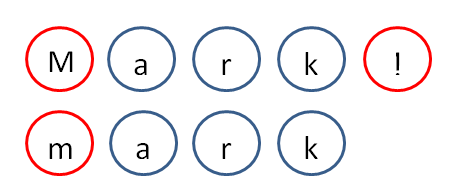

> When you have a very simple set of strings which look almost similar with their words, you can use the simple ratio

__fuzz.partial_ratio__

Most of the times the simple ratio won’t work as it is very rigid in detecting the matches. For example, when we wouldn’t like to take into consideration all the small details like stop words, punctuations, capital letters etc., it’s better to use the Partial Ratio. 

Calls ratio using the shortest string (length n) against all n-length substrings of the larger string and returns the highest score (code).

Notice here that "YANKEES" is the shortest string (length 7), and we run the ratio with "YANKEES" against all substrings of length 7 of "NEW YORK YANKEES" (which would include checking against "YANKEES", a 100% match):

In [77]:
print(fuzz.ratio("YANKEES", "NEW YORK YANKEES"))
print(fuzz.partial_ratio("YANKEE", "NEW YORK YANKEES"))
print(fuzz.token_set_ratio("YANKEE", "NEW YORK YANKEES"))

61
100
55


In [41]:
fuzz.partial_ratio("Humpty Dumpty sat on a wall !", "Humpty Dumpty")

100

__fuzz.token_sort_ratio__

If the order in which the words are placed in a particular sentence doesn’t matter then the best way to match two strings is by the use of Token Sort Ratio from the package.

Calls ratio on both strings after sorting the tokens in each string . 

Notice here fuzz.ratio and fuzz.partial_ratio both fail, but once you sort the tokens it's a 100% match:

In [20]:
print(fuzz.ratio("New York Mets vs Atlanta Braves", "Atlanta Braves vs New York Mets"))
print(fuzz.partial_ratio("New York Mets vs Atlanta Braves", "Atlanta Braves vs New York Mets"))
print(fuzz.token_sort_ratio("New York Mets vs Atlanta Braves", "Atlanta Braves vs New York Mets"))


45
45
100


In [21]:
fuzz.token_sort_ratio("Humpty Dumpty sat on a wall","Dumpty Humpty wall on sat a")

100

__fuzz.token_set_ratio__

When you don’t care about the number of times a word in the string is repeated, then it is better to use the Token Set Ratio from the package.  

Calls ratio on three particular substring sets and returns the max (code):

intersection-only and the intersection with remainder of string one
intersection-only and the intersection with remainder of string two
intersection with remainder of one and intersection with remainder of two

Notice that by splitting up the intersection and remainders of the two strings, we're accounting for both how similar and different the two strings are:

In [42]:
print(fuzz.ratio("mariners vs angels",         "los angeles angels of anaheim at seattle mariners"))
print(fuzz.partial_ratio("mariners vs angels", "los angeles angels of anaheim at seattle mariners"))
print(fuzz.token_sort_ratio("mariners vs angels", "los angeles angels of anaheim at seattle mariners"))
print(fuzz.token_set_ratio("mariners vs angels",  "los angeles angels of anaheim at seattle mariners"))


24
62
51
91


In [ ]:
29, DOWN TOWN, XYS Streat, U.S.A
DOWN Town, XYZ, st. US, 29
29 down town xyZ, ST USA
usa
Usa

topic molling in python
topic modelling in python


In [43]:
fuzz.token_set_ratio("Humpty Dumpty sat on a wall", "Humpty Humpty Dumpty sat on a wall")

100

In [44]:
query = "Mango"

choices = ['mango', 'go', 'an', 'Mango!', 'man', 'orange']

In [45]:
process.extract(query, choices)

[('mango', 100), ('Mango!', 100), ('go', 90), ('an', 90), ('man', 90)]

In [46]:
process.extractOne(query, choices)

('mango', 100)

In [47]:
query = "Mango"
choices = ['Pogo', 'orange', 'apple', 'Mango!', 'fruits', 'Tango']

process.extract(query, choices, scorer = fuzz.partial_ratio, limit = 2)

[('Mango!', 100), ('Tango', 80)]

## Example 

In [48]:
from fuzzywuzzy import process
import pandas as pd

In [49]:
names_array=[]
ratio_array=[]

In [78]:
df=pd.read_csv("wrong-country-names.csv",encoding="ISO-8859-1")
wrong_names=df['name'].dropna().values

In [80]:
df.tail(10)

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,region-code,sub-region-code
239,Zimbebwe,ZW,ZWE,716,ISO 3166-2:ZW,Africa,Eastern Africa,2.0,14.0
240,enterctice,AQ,ATA,10,ISO 3166-2:AQ,NaN,NaN,NaN,NaN
241,Bouvet Islend,BV,BVT,74,ISO 3166-2:BV,NaN,NaN,NaN,NaN
242,British Indien Oceen Territory,IO,IOT,86,ISO 3166-2:IO,NaN,NaN,NaN,NaN
243,Christmes Islend,CX,CXR,162,ISO 3166-2:CX,NaN,NaN,NaN,NaN
244,Cocos (Keeling) Islends,CC,CCK,166,ISO 3166-2:CC,NaN,NaN,NaN,NaN
245,French Southern Territories,TF,ATF,260,ISO 3166-2:TF,NaN,NaN,NaN,NaN
246,Heerd Islend end McDoneld Islends,HM,HMD,334,ISO 3166-2:HM,NaN,NaN,NaN,NaN
247,South Georgie end the South Sendwich Islends,GS,SGS,239,ISO 3166-2:GS,NaN,NaN,NaN,NaN
248,United Stetes Minor Outlying Islends,UM,UMI,581,ISO 3166-2:UM,NaN,NaN,NaN,NaN


In [81]:

def match_names(wrong_names,correct_names):
    for row in wrong_names:
        x=process.extractOne(row, correct_names)
        names_array.append(x[0])
        ratio_array.append(x[1])
    return names_array,ratio_array
 
 
# Wrong country names dataset
df=pd.read_csv("wrong-country-names.csv",encoding="ISO-8859-1")
wrong_names=df['name'].dropna().values
 
#Correct country names dataset
choices_df=pd.read_csv("country-names.csv",encoding="ISO-8859-1")
correct_names=choices_df['name'].values
 
name_match,ratio_match=match_names(wrong_names,correct_names)
 
df['correct_country_name']=pd.Series(name_match)
df['country_names_ratio']=pd.Series(ratio_match)
 
df.to_csv("string_matched_country_names.csv")
 
print(df[['name','correct_country_name','country_names_ratio']].head(10))

                     name    correct_country_name  country_names_ratio
0           Ålend Islends           Åland Islands                   83
1                 elbenie                    Niue                   77
2                 endorre                 Andorra                   71
3                 eustrie                 Austria                   71
4                 Belerus                 Belarus                   86
5                 Belgium                 Belgium                  100
6  Bosnie end Herzegovine  Bosnia and Herzegovina                   86
7                Bulgerie                Bulgaria                   75
8                 Croetie                 Croatia                   71
9          Czech Republic          Czech Republic                  100


In [82]:
display(df[['name','correct_country_name','country_names_ratio']])

,name,correct_country_name,country_names_ratio
0,Ålend Islends,Åland Islands,83
1,elbenie,Niue,77
2,endorre,Andorra,71
3,eustrie,Austria,71
4,Belerus,Belarus,86
...,...,...,...
244,Cocos (Keeling) Islends,Cocos (Keeling) Islands,96
245,French Southern Territories,French Southern Territories,100
246,Heerd Islend end McDoneld Islends,Heard Island and McDonald Islands,85
247,South Georgie end the South Sendwich Islends,South Georgia and the South Sandwich Islands,91
